## KNN

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('BreastCancer.csv')

In [3]:
feature = data.loc[:,['radius_mean','area_mean']]
label=data.iloc[:,1]

In [4]:
le = preprocessing.LabelEncoder()
encodedlabel = le.fit_transform(label)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature,encodedlabel, test_size=0.34,random_state = 5)

In [6]:
knn = KNeighborsClassifier(n_neighbors=6)

# Train the model using the training sets
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

In [7]:
accuracy = metrics.accuracy_score(predict, y_test)

In [8]:
accuracy

0.9175257731958762

Text(0, 0.5, 'area_mean')

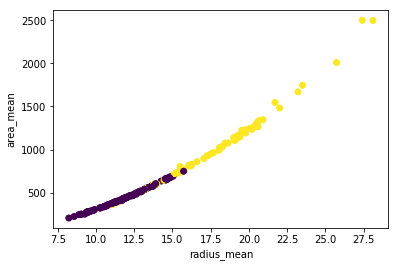

In [9]:
plt.scatter(X_test.values[:,0],X_test.values[:,1],c=y_test)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')

## K-means

In [10]:
from sklearn import cluster

In [12]:
km = cluster.KMeans(n_clusters=2)  #K=2群
y_pred = km.fit_predict(feature)

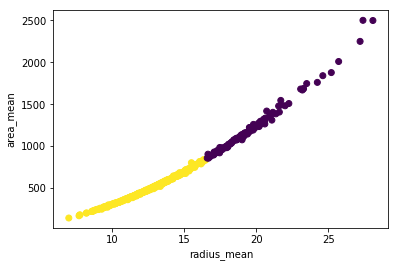

In [13]:
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.scatter(feature.values[:,0],feature.values[:,1],c=y_pred) #C是第三維度 已顏色做維度
plt.show()

## 移除異常點

In [14]:
newData = data[data.area_mean<2000]

In [15]:
newfeature = newData.loc[:,['radius_mean','area_mean']]
newlabel=newData.iloc[:,1]

In [16]:
le = preprocessing.LabelEncoder()
encodedlabel = le.fit_transform(newlabel)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(newfeature,encodedlabel, test_size=0.34,random_state = 5)

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)

# Train the model using the training sets
knn.fit(X_train, y_train)

predict = knn.predict(X_test)

In [19]:
accuracy = metrics.accuracy_score(predict, y_test)

In [20]:
accuracy

0.8860103626943006

Text(0, 0.5, 'area_mean')

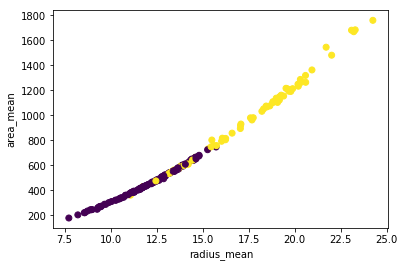

In [21]:
plt.scatter(X_test.values[:,0],X_test.values[:,1],c=y_test)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')

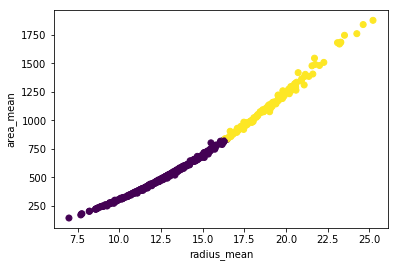

In [22]:
km = cluster.KMeans(n_clusters=2)  
y_pred = km.fit_predict(newfeature)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.scatter(newfeature.values[:,0],newfeature.values[:,1],c=y_pred) 
plt.show()